In [29]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
f = open("vectors.txt","r")
image_indices = {}
image_vectors = []
list = f.readlines()
for ind, line in enumerate(list):
    
    splited_line = line.rstrip('\r\n').split(' ')
    embedding = [float(x) for x in splited_line[0:]]
    image_indices[ind] = embedding
    image_vectors.append(embedding)
    
X = np.array(image_vectors)
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)


In [31]:
knn_indices = {}
for key in image_indices.keys():
    distances, indices = nbrs.kneighbors([image_indices[key]])
    knn_indices[key] = indices[0]

In [33]:
import pickle
pickle.dump(knn_indices, open( "knn_indices.pkl", "wb" ))

In [73]:
input = open("images.txt","r")
index_to_titles = {}
titles = input.readlines()
for ind, title in enumerate(titles):
    index_to_titles[ind] = title

In [54]:
import os
from IPython.display import Image,display


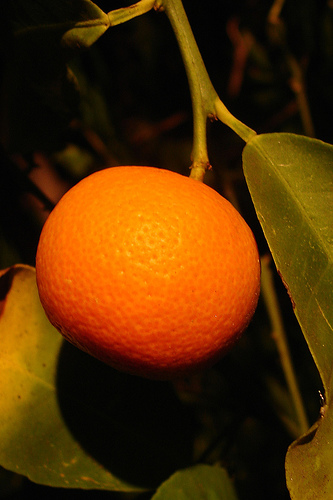

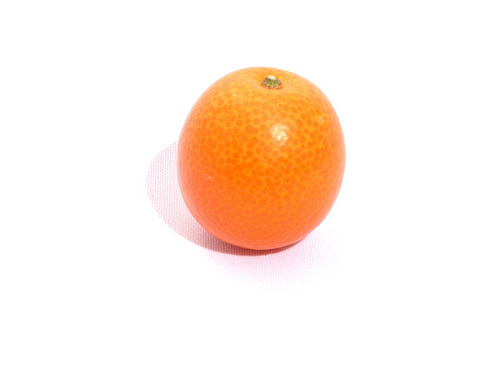

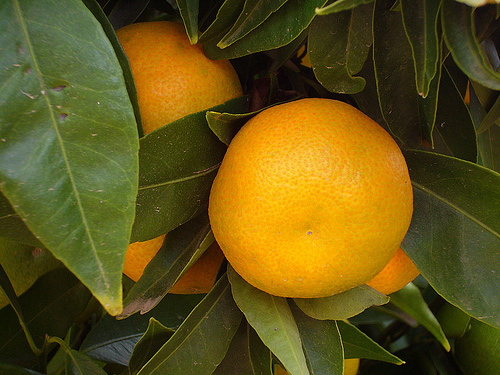

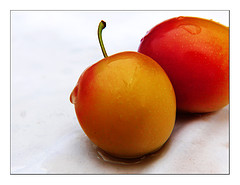

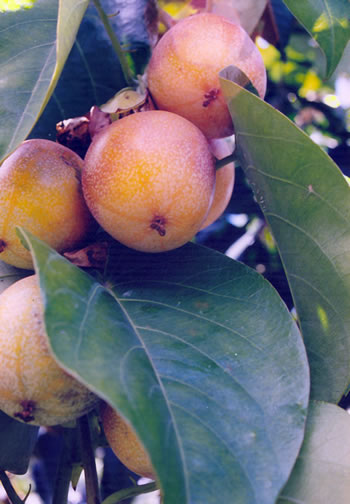

In [74]:
from matplotlib import pyplot as plt
#give any id from 0 to 534 in the following line and check
#pictures look really relevant to me
names = [index_to_titles[index] for index in knn_indices[210]]
for name in names:
    img = Image(filename = str(name).rstrip('\r\n'))
    display(img)

